## Dependencies & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 1000)

## Data Imports

In [3]:
df = pd.read_csv('../data/raw/2025_LoL_esports_match_data_from_OraclesElixir.csv', dtype={'url': str})
regions_df = pd.read_csv('../data/raw/teams_regions.csv', keep_default_na=False, na_values=[]) # Ensures NA isn't treated as nulls.

## Transformation Prep

In [4]:
leagues = ['LPL', 'LCK', 'LEC', 'LTA N', 'MSI', 'WLDs']
regions_dict = regions_df.set_index('team')['region'].to_dict()

## Cleaning & Preparing

In [65]:
df1 = df[df['league'].isin(leagues)].reset_index(drop=True)

In [99]:
df1

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,atakhans,opp_atakhans,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,damagetotowers,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,gpr,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,11715-11715_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11715,LPL,2025,Split 1,0,2025-01-12 09:24:17,1,15.01,1,Blue,top,Breathe,oe:player:0d9b0a3b3a93a8f759c9d8ac8eef97c,Weibo Gaming,oe:team:606c6ac695907af3823ee6405c58ff1,K'Sante,Jayce,Poppy,Rumble,Rakan,Rell,NaN,NaN,NaN,NaN,NaN,2123,1,4,0,3,17,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.4805,0.6218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9830,277.8144,0.123949,747.1032,NaN,NaN,14,0.3957,3,0.0848,5,32,0.9044,14706,10099,285.4169,0.217523,12934,NaN,NaN,314.0,310.0,4,0.0,0.0,8.8742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11715-11715_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11715,LPL,2025,Split 1,0,2025-01-12 09:24:17,1,15.01,2,Blue,jng,Tian,oe:player:0da0eeb199e8fa3ab773cf84f9de9ab,Weibo Gaming,oe:team:606c6ac695907af3823ee6405c58ff1,Viego,Jayce,Poppy,Rumble,Rakan,Rell,NaN,NaN,NaN,NaN,NaN,2123,1,4,0,5,17,5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.4805,0.6218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10013,282.9863,0.126255,1207.4611,NaN,NaN,13,0.3674,14,0.3957,12,55,1.5544,14586,9979,282.0254,0.214939,13193,NaN,NaN,273.0,35.0,238,0.0,0.0,7.7155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11715-11715_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=11715,LPL,2025,Split 1,0,2025-01-12 09:24:17,1,15.01,3,Blue,mid,Xiaohu,oe:player:beea9fe15bff6a7ab0b3913d3d5fde6,Weibo Gaming,oe:team:606c6ac695907af3823ee6405c58ff1,Aurora,Jayce,Poppy,Rumble,Rakan,Rell,NaN,NaN,NaN,NaN,NaN,2123,1,5,1,8,17,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.4805,0.6218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [66]:
df2 = df1.dropna(subset='pick1').dropna(axis=1, how='all').reset_index(drop=True)

In [6]:
df2['year'].value_counts()

year
2025    4062
2026      48
Name: count, dtype: int64

In [7]:
df2[df2['year'] == 2026]['date']

3894    2025-10-04 20:08:48
3895    2025-10-04 20:08:48
3896    2025-10-04 20:58:48
3897    2025-10-04 20:58:48
3898    2025-10-04 21:49:17
3899    2025-10-04 21:49:17
3900    2025-10-04 22:33:19
3901    2025-10-04 22:33:19
3902    2025-10-04 23:28:14
3903    2025-10-04 23:28:14
3904    2025-10-05 20:13:09
3905    2025-10-05 20:13:09
3906    2025-10-05 21:06:34
3907    2025-10-05 21:06:34
3908    2025-10-05 22:08:47
3909    2025-10-05 22:08:47
3910    2025-10-06 20:07:03
3911    2025-10-06 20:07:03
3912    2025-10-06 21:09:35
3913    2025-10-06 21:09:35
3914    2025-10-07 00:00:39
3915    2025-10-07 00:00:39
3916    2025-10-08 20:08:33
3917    2025-10-08 20:08:33
3918    2025-10-08 21:18:22
3919    2025-10-08 21:18:22
3920    2025-10-08 22:06:05
3921    2025-10-08 22:06:05
3922    2025-10-09 20:09:13
3923    2025-10-09 20:09:13
3924    2025-10-09 21:04:11
3925    2025-10-09 21:04:11
3926    2025-10-09 22:00:29
3927    2025-10-09 22:00:29
3928    2025-10-10 20:07:51
3929    2025-10-10 2

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 155 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    gameid                    4110 non-null   object 
 1    datacompleteness          4110 non-null   object 
 2    url                       1634 non-null   object 
 3    league                    4110 non-null   object 
 4    year                      4110 non-null   int64  
 5    split                     3710 non-null   object 
 6    playoffs                  4110 non-null   int64  
 7    date                      4110 non-null   object 
 8    game                      4110 non-null   int64  
 9    patch                     4110 non-null   float64
 10   participantid             4110 non-null   int64  
 11   side                      4110 non-null   object 
 12   position                  4110 non-null   object 
 13   teamname                  4110 non-null   obje

In [9]:
df2[df2['datacompleteness'] == 'partial']['league'].value_counts()

league
LPL     1610
WLDs      24
Name: count, dtype: int64

In [10]:
df3 = df2[df2['datacompleteness'] == 'complete'].reset_index(drop=True)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 155 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    gameid                    2476 non-null   object 
 1    datacompleteness          2476 non-null   object 
 2    url                       0 non-null      object 
 3    league                    2476 non-null   object 
 4    year                      2476 non-null   int64  
 5    split                     2100 non-null   object 
 6    playoffs                  2476 non-null   int64  
 7    date                      2476 non-null   object 
 8    game                      2476 non-null   int64  
 9    patch                     2476 non-null   float64
 10   participantid             2476 non-null   int64  
 11   side                      2476 non-null   object 
 12   position                  2476 non-null   object 
 13   teamname                  2476 non-null   obje

In [100]:
cols_to_keep = ['gameid', 'league', 'playoffs', 'game', 'side', 'teamname', 'result', 'firstblood', 'firstdragon', 'void_grubs', 'opp_void_grubs',
                'turretplates', 'opp_turretplates', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15',
                'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']

In [70]:
df4 = df3[cols_to_keep]

In [14]:
df4.head()

,gameid,league,playoffs,game,side,teamname,result,firstdragon,void_grubs,opp_void_grubs,turretplates,opp_turretplates,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,LOLTMNT03_183532,LCK,0,1,Blue,OKSavingsBank BRION,1,1.0,4.0,2.0,4.0,1.0,25921.0,30248.0,553.0,22854.0,27660.0,529.0,3067.0,2588.0,24.0,5.0,13.0,1.0,1.0,3.0,5.0
1,LOLTMNT03_183532,LCK,0,1,Red,DRX,0,0.0,2.0,4.0,1.0,4.0,22854.0,27660.0,529.0,25921.0,30248.0,553.0,-3067.0,-2588.0,-24.0,1.0,3.0,5.0,5.0,13.0,1.0
2,LOLTMNT03_183538,LCK,0,2,Blue,DRX,1,1.0,6.0,0.0,7.0,2.0,24685.0,29831.0,530.0,23209.0,29020.0,536.0,1476.0,811.0,-6.0,3.0,6.0,1.0,1.0,2.0,3.0
3,LOLTMNT03_183538,LCK,0,2,Red,OKSavingsBank BRION,0,0.0,0.0,6.0,2.0,7.0,23209.0,29020.0,536.0,24685.0,29831.0,530.0,-1476.0,-811.0,6.0,1.0,2.0,3.0,3.0,6.0,1.0
4,LOLTMNT03_183544,LCK,0,3,Blue,OKSavingsBank BRION,0,0.0,5.0,1.0,2.0,3.0,25831.0,31298.0,562.0,23838.0,30242.0,557.0,1993.0,1056.0,5.0,5.0,9.0,0.0,0.0,0.0,5.0


In [71]:
df_combined = df4.pivot(index='gameid', columns='side', values=['teamname', 'result', 'firstblood', 'firstdragon', 'void_grubs', 'turretplates', 'goldat15', 'xpat15', 'csat15', 'golddiffat15', 
                                                  'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15'])

df_combined.columns = [f'{col[0]}_{col[1]}' for col in df_combined.columns]
df_combined = df_combined.reset_index()

In [72]:
df_combined.head()

,gameid,teamname_Blue,teamname_Red,result_Blue,result_Red,firstblood_Blue,firstblood_Red,firstdragon_Blue,firstdragon_Red,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,goldat15_Blue,goldat15_Red,xpat15_Blue,xpat15_Red,csat15_Blue,csat15_Red,golddiffat15_Blue,golddiffat15_Red,xpdiffat15_Blue,xpdiffat15_Red,csdiffat15_Blue,csdiffat15_Red,killsat15_Blue,killsat15_Red,assistsat15_Blue,assistsat15_Red,deathsat15_Blue,deathsat15_Red
0,LOLTMNT01_191712,Shopify Rebellion,FlyQuest,0,1,1.0,0.0,0.0,1.0,1.0,5.0,1.0,6.0,22761.0,25516.0,27872.0,29618.0,493.0,519.0,-2755.0,2755.0,-1746.0,1746.0,-26.0,26.0,2.0,3.0,4.0,9.0,3.0,2.0
1,LOLTMNT01_191718,Shopify Rebellion,FlyQuest,0,1,0.0,1.0,1.0,0.0,1.0,5.0,0.0,10.0,22767.0,26550.0,28418.0,31471.0,495.0,560.0,-3783.0,3783.0,-3053.0,3053.0,-65.0,65.0,2.0,3.0,3.0,5.0,3.0,2.0
2,LOLTMNT01_192790,LYON,Cloud9,0,1,0.0,1.0,0.0,1.0,3.0,3.0,1.0,3.0,22927.0,24125.0,29468.0,30851.0,550.0,583.0,-1198.0,1198.0,-1383.0,1383.0,-33.0,33.0,0.0,1.0,0.0,3.0,1.0,0.0
3,LOLTMNT01_192797,LYON,Cloud9,0,1,1.0,0.0,0.0,1.0,1.0,5.0,2.0,2.0,23985.0,24885.0,29172.0,29294.0,510.0,527.0,-900.0,900.0,-122.0,122.0,-17.0,17.0,4.0,4.0,9.0,9.0,4.0,4.0
4,LOLTMNT01_193134,Dignitas,Team Liquid,0,1,0.0,1.0,0.0,1.0,2.0,4.0,3.0,4.0,23571.0,26478.0,29053.0,30748.0,520.0,551.0,-2907.0,2907.0,-1695.0,1695.0,-31.0,31.0,1.0,4.0,3.0,7.0,4.0,1.0


In [73]:
df_combined_2 = df_combined.drop(columns=['result_Red', 'firstblood_Red', 'firstdragon_Red', 'goldat15_Blue', 'goldat15_Red', 'xpat15_Blue', 'xpat15_Red', 'csat15_Blue', 'csat15_Red',
                                          'golddiffat15_Red', 'xpdiffat15_Red', 'csdiffat15_Red'])

In [74]:
df_combined_2.head(10)

,gameid,teamname_Blue,teamname_Red,result_Blue,firstblood_Blue,firstdragon_Blue,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,golddiffat15_Blue,xpdiffat15_Blue,csdiffat15_Blue,killsat15_Blue,killsat15_Red,assistsat15_Blue,assistsat15_Red,deathsat15_Blue,deathsat15_Red
0,LOLTMNT01_191712,Shopify Rebellion,FlyQuest,0,1.0,0.0,1.0,5.0,1.0,6.0,-2755.0,-1746.0,-26.0,2.0,3.0,4.0,9.0,3.0,2.0
1,LOLTMNT01_191718,Shopify Rebellion,FlyQuest,0,0.0,1.0,1.0,5.0,0.0,10.0,-3783.0,-3053.0,-65.0,2.0,3.0,3.0,5.0,3.0,2.0
2,LOLTMNT01_192790,LYON,Cloud9,0,0.0,0.0,3.0,3.0,1.0,3.0,-1198.0,-1383.0,-33.0,0.0,1.0,0.0,3.0,1.0,0.0
3,LOLTMNT01_192797,LYON,Cloud9,0,1.0,0.0,1.0,5.0,2.0,2.0,-900.0,-122.0,-17.0,4.0,4.0,9.0,9.0,4.0,4.0
4,LOLTMNT01_193134,Dignitas,Team Liquid,0,0.0,0.0,2.0,4.0,3.0,4.0,-2907.0,-1695.0,-31.0,1.0,4.0,3.0,7.0,4.0,1.0
5,LOLTMNT01_193140,Dignitas,Team Liquid,0,1.0,0.0,3.0,3.0,0.0,6.0,-2742.0,-3312.0,-16.0,4.0,7.0,9.0,9.0,7.0,4.0
6,LOLTMNT01_194069,Disguised,100 Thieves,0,1.0,1.0,2.0,4.0,3.0,3.0,458.0,529.0,33.0,3.0,2.0,2.0,2.0,2.0,3.0
7,LOLTMNT01_194092,Disguised,100 Thieves,0,0.0,0.0,3.0,3.0,1.0,5.0,-604.0,-1121.0,-26.0,4.0,4.0,12.0,11.0,4.0,4.0
8,LOLTMNT01_195821,KT Rolster,DN Freecs,1,1.0,1.0,5.0,1.0,3.0,2.0,1829.0,1625.0,27.0,2.0,0.0,1.0,0.0,0.0,2.0
9,LOLTMNT01_195885,DRX,Hanwha Life Esports,0,0.0,1.0,2.0,4.0,1.0,5.0,-2500.0,-1741.0,-56.0,4.0,6.0,10.0,15.0,6.0,4.0


In [75]:
cols_to_numeric = ['result_Blue', 'firstblood_Blue', 'firstdragon_Blue', 'void_grubs_Blue', 'void_grubs_Red', 'turretplates_Blue', 'turretplates_Red',
                   'golddiffat15_Blue', 'xpdiffat15_Blue', 'csdiffat15_Blue', 'killsat15_Blue', 'killsat15_Red', 'assistsat15_Blue', 
                   'assistsat15_Red', 'deathsat15_Blue', 'deathsat15_Red']

df_combined_2[cols_to_numeric] = df_combined_2[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

In [76]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameid             1238 non-null   object 
 1   teamname_Blue      1238 non-null   object 
 2   teamname_Red       1238 non-null   object 
 3   result_Blue        1238 non-null   int64  
 4   firstblood_Blue    1238 non-null   float64
 5   firstdragon_Blue   1238 non-null   float64
 6   void_grubs_Blue    1238 non-null   float64
 7   void_grubs_Red     1238 non-null   float64
 8   turretplates_Blue  1238 non-null   float64
 9   turretplates_Red   1238 non-null   float64
 10  golddiffat15_Blue  1238 non-null   float64
 11  xpdiffat15_Blue    1238 non-null   float64
 12  csdiffat15_Blue    1238 non-null   float64
 13  killsat15_Blue     1238 non-null   float64
 14  killsat15_Red      1238 non-null   float64
 15  assistsat15_Blue   1238 non-null   float64
 16  assistsat15_Red    1238 

In [21]:
df_combined_2['result_Blue'].value_counts()

result_Blue
1    647
0    591
Name: count, dtype: int64

In [77]:
df_combined_2['region_Blue'] = df_combined_2['teamname_Blue'].map(regions_dict)
df_combined_2['region_Red'] = df_combined_2['teamname_Red'].map(regions_dict)

In [23]:
df_combined_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameid             1238 non-null   object 
 1   teamname_Blue      1238 non-null   object 
 2   teamname_Red       1238 non-null   object 
 3   result_Blue        1238 non-null   int64  
 4   firstdragon_Blue   1238 non-null   float64
 5   void_grubs_Blue    1238 non-null   float64
 6   void_grubs_Red     1238 non-null   float64
 7   turretplates_Blue  1238 non-null   float64
 8   turretplates_Red   1238 non-null   float64
 9   golddiffat15_Blue  1238 non-null   float64
 10  xpdiffat15_Blue    1238 non-null   float64
 11  csdiffat15_Blue    1238 non-null   float64
 12  killsat15_Blue     1238 non-null   float64
 13  killsat15_Red      1238 non-null   float64
 14  assistsat15_Blue   1238 non-null   float64
 15  assistsat15_Red    1238 non-null   float64
 16  deathsat15_Blue    1238 

In [78]:
df_combined_2['region_Blue'] = df_combined_2['region_Blue'].fillna('Other')
df_combined_2['region_Red'] = df_combined_2['region_Red'].fillna('Other')

region_strength = {'KR': 4, 'CN': 3, 'EU': 2, 'NA': 1, 'Other': 0}

df_combined_2['region'] = np.where(df_combined_2['region_Blue'] == df_combined_2['region_Red'], df_combined_2['region_Blue'], 'International')
df_combined_2['region_diff'] = df_combined_2['region_Blue'].map(region_strength) - df_combined_2['region_Red'].map(region_strength)

In [79]:
df_combined_3 = df_combined_2.drop(columns=['gameid', 'teamname_Blue', 'teamname_Red', 'region_Blue', 'region_Red'])

In [80]:
df_combined_3

,result_Blue,firstblood_Blue,firstdragon_Blue,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,golddiffat15_Blue,xpdiffat15_Blue,csdiffat15_Blue,killsat15_Blue,killsat15_Red,assistsat15_Blue,assistsat15_Red,deathsat15_Blue,deathsat15_Red,region,region_diff
0,0,1.0,0.0,1.0,5.0,1.0,6.0,-2755.0,-1746.0,-26.0,2.0,3.0,4.0,9.0,3.0,2.0,NA,0
1,0,0.0,1.0,1.0,5.0,0.0,10.0,-3783.0,-3053.0,-65.0,2.0,3.0,3.0,5.0,3.0,2.0,NA,0
2,0,0.0,0.0,3.0,3.0,1.0,3.0,-1198.0,-1383.0,-33.0,0.0,1.0,0.0,3.0,1.0,0.0,NA,0
3,0,1.0,0.0,1.0,5.0,2.0,2.0,-900.0,-122.0,-17.0,4.0,4.0,9.0,9.0,4.0,4.0,NA,0
4,0,0.0,0.0,2.0,4.0,3.0,4.0,-2907.0,-1695.0,-31.0,1.0,4.0,3.0,7.0,4.0,1.0,NA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0,1.0,0.0,3.0,3.0,8.0,2.0,3625.0,1344.0,38.0,3.0,0.0,5.0,0.0,0.0,3.0,EU,0
1234,1,0.0,0.0,3.0,3.0,5.0,1.0,3646.0,2194.0,76.0,10.0,2.0,15.0,4.0,2.0,10.0,EU,0
1235,0,0.0,0.0,0.0,6.0,1.0,11.0,-5112.0,-2647.0,-62.0,4.0,9.0,7.0,21.0,9.0,4.0,EU,0
1236,1,0.0,0.0,5.0,1.0,5.0,2.0,1493.0,857.0,39.0,2.0,3.0,4.0,8.0,3.0,3.0,EU,0


## Modelling

In [46]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

import lightgbm as lgb
from scipy.stats import randint as sp_randint, uniform as sp_uniform

In [28]:
def get_results(actual, predicted, probability):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The ROC-AUC score of your model is: {metrics.roc_auc_score(actual, probability)}')

In [81]:
encoded_df = pd.get_dummies(df_combined_3, columns=['region'], drop_first=True, dtype=int)

In [30]:
encoded_df

,result_Blue,firstdragon_Blue,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,golddiffat15_Blue,xpdiffat15_Blue,csdiffat15_Blue,killsat15_Blue,killsat15_Red,assistsat15_Blue,assistsat15_Red,deathsat15_Blue,deathsat15_Red,region_diff,region_EU,region_International,region_KR,region_NA,region_Other
0,0,0.0,1.0,5.0,1.0,6.0,-2755.0,-1746.0,-26.0,2.0,3.0,4.0,9.0,3.0,2.0,0,0,0,0,1,0
1,0,1.0,1.0,5.0,0.0,10.0,-3783.0,-3053.0,-65.0,2.0,3.0,3.0,5.0,3.0,2.0,0,0,0,0,1,0
2,0,0.0,3.0,3.0,1.0,3.0,-1198.0,-1383.0,-33.0,0.0,1.0,0.0,3.0,1.0,0.0,0,0,0,0,1,0
3,0,0.0,1.0,5.0,2.0,2.0,-900.0,-122.0,-17.0,4.0,4.0,9.0,9.0,4.0,4.0,0,0,0,0,1,0
4,0,0.0,2.0,4.0,3.0,4.0,-2907.0,-1695.0,-31.0,1.0,4.0,3.0,7.0,4.0,1.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0,0.0,3.0,3.0,8.0,2.0,3625.0,1344.0,38.0,3.0,0.0,5.0,0.0,0.0,3.0,0,1,0,0,0,0
1234,1,0.0,3.0,3.0,5.0,1.0,3646.0,2194.0,76.0,10.0,2.0,15.0,4.0,2.0,10.0,0,1,0,0,0,0
1235,0,0.0,0.0,6.0,1.0,11.0,-5112.0,-2647.0,-62.0,4.0,9.0,7.0,21.0,9.0,4.0,0,1,0,0,0,0
1236,1,0.0,5.0,1.0,5.0,2.0,1493.0,857.0,39.0,2.0,3.0,4.0,8.0,3.0,3.0,0,1,0,0,0,0


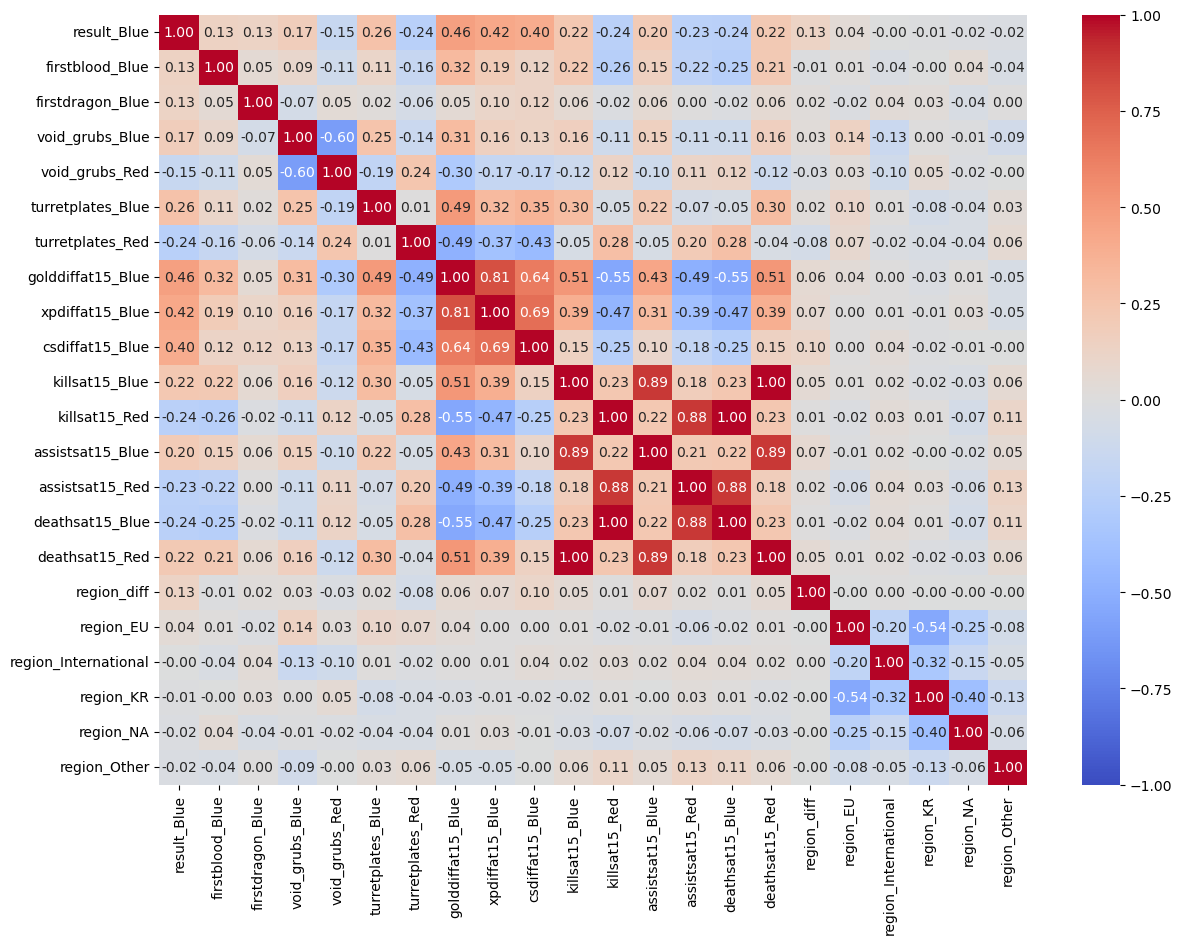

In [82]:
corr_matrix = encoded_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    fmt='.2f'
    )

plt.show()

In [83]:
encoded_df = encoded_df.drop(columns=['assistsat15_Blue', 'assistsat15_Red', 'deathsat15_Blue', 'deathsat15_Red'])

In [84]:
X = encoded_df.drop(columns='result_Blue')
y = encoded_df['result_Blue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [85]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [86]:
scale_cols = ['void_grubs_Blue', 'void_grubs_Red', 'turretplates_Blue', 'turretplates_Red', 'golddiffat15_Blue', 'xpdiffat15_Blue', 'csdiffat15_Blue',
              'killsat15_Blue', 'killsat15_Red']

scaler = StandardScaler()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train_scaled[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test_scaled[scale_cols])

In [87]:
logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

In [88]:
get_results(y_test, y_pred, y_prob)

The confusion matrix for your predictions is:
[[75 43]
 [41 89]] 

The accuracy of your model is: 0.6612903225806451
The ROC-AUC score of your model is: 0.7333767926988266


In [89]:
feature_importance = pd.DataFrame(zip(X.columns, logreg.coef_[0]), columns=['feature', 'importance']).sort_values('importance', ascending=False)
feature_importance

,feature,importance
8,csdiffat15_Blue,0.543423
1,firstdragon_Blue,0.483557
11,region_diff,0.475969
6,golddiffat15_Blue,0.371184
12,region_EU,0.332824
4,turretplates_Blue,0.276752
9,killsat15_Blue,0.224985
2,void_grubs_Blue,0.202581
14,region_KR,0.185235
7,xpdiffat15_Blue,0.105702


## Random Forest

In [90]:
rf = RandomForestClassifier(max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9848484848484849
0.6854838709677419


In [91]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12, 14, None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 0.5]
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=params,
    n_iter=100,
    cv=10,
    random_state=42,
    verbose=2,
    n_jobs=-1,
    scoring='accuracy'
)

rs.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [8, 10, 12, 14, None],
                                        'max_features': ['sqrt', 0.5],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [10, 20, 50],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [94]:
print(f'Best Parameters: {rs.best_params_}')
print(f'Best Training Score: {rs.best_score_:.4f}')

best_rs = rs.best_estimator_

y_pred_rs = best_rs.predict(X_test)
y_prob_rs = best_rs.predict_proba(X_test)[:, 1]

get_results(y_test, y_pred_rs, y_prob_rs)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 8}
Best Training Score: 0.7081
The confusion matrix for your predictions is:
[[78 40]
 [36 94]] 

The accuracy of your model is: 0.6935483870967742
The ROC-AUC score of your model is: 0.746805736636245


In [42]:
feature_importance_rf = pd.DataFrame(
    zip(X.columns, rf.feature_importances_), columns=['feature', 'importance']).sort_values('importance', ascending=False)

feature_importance_rf

,feature,importance
5,golddiffat15_Blue,0.246146
6,xpdiffat15_Blue,0.166051
7,csdiffat15_Blue,0.153771
3,turretplates_Blue,0.074858
9,killsat15_Red,0.063248
4,turretplates_Red,0.060995
8,killsat15_Blue,0.054487
1,void_grubs_Blue,0.046757
2,void_grubs_Red,0.040057
0,firstdragon_Blue,0.022704


## LightGBM

In [95]:
lgbm = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc')

y_pred_lgbm = lgbm.predict(X_test)
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]

get_results(y_test, y_pred_lgbm, y_prob_lgbm)

The confusion matrix for your predictions is:
[[72 46]
 [36 94]] 

The accuracy of your model is: 0.6693548387096774
The ROC-AUC score of your model is: 0.7162972620599739


In [96]:
params_lgbm = {
    'num_leaves': sp_randint(20, 100),
    'max_depth': sp_randint(3, 14),
    'learning_rate': sp_uniform(0.01, 0.2),
    'n_estimators': sp_randint(50, 500),
    'min_child_samples': sp_randint(10, 50),
    'subsample': sp_uniform(0.6, 0.4),
    'colsample_bytree': sp_uniform(0.6, 0.4),
    'reg_alpha': sp_uniform(0.0, 1.0),
    'reg_lambda': sp_uniform(0.0, 1.0)
}

rs_lgbm = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42, verbose=-1),
    param_distributions=params_lgbm,
    n_iter=100,
    scoring='roc_auc',
    cv=10,
    random_state=42,
    n_jobs=-1
)

rs_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LGBMClassifier(random_state=42, verbose=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025704620C90>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025704662190>,
                                        'max_depth': <scipy.stats._dis...
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025708087570>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025704620050>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025707F925F0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025704622A50>},
                   random_state=42, scoring='roc_auc')

In [97]:
print(f'Best Parameters: {rs_lgbm.best_params_}')
print(f'Best Training Score: {rs_lgbm.best_score_:.4f}')

best_rs_lgbm = rs_lgbm.best_estimator_
print(f'Best Testing Score: {best_rs_lgbm.score(X_test, y_test):.4f}')

y_pred_rs_lgbm = best_rs_lgbm.predict(X_test)
y_prob_rs_lgbm = best_rs_lgbm.predict_proba(X_test)[:, 1]

get_results(y_test, y_pred_rs_lgbm, y_prob_rs_lgbm)

Best Parameters: {'colsample_bytree': np.float64(0.6301738188359077), 'learning_rate': np.float64(0.043243086381850586), 'max_depth': 3, 'min_child_samples': 23, 'n_estimators': 192, 'num_leaves': 50, 'reg_alpha': np.float64(0.9958313750293707), 'reg_lambda': np.float64(0.6969250558638148), 'subsample': np.float64(0.753680732551688)}
Best Training Score: 0.7895
Best Testing Score: 0.6694
The confusion matrix for your predictions is:
[[79 39]
 [43 87]] 

The accuracy of your model is: 0.6693548387096774
The ROC-AUC score of your model is: 0.749348109517601


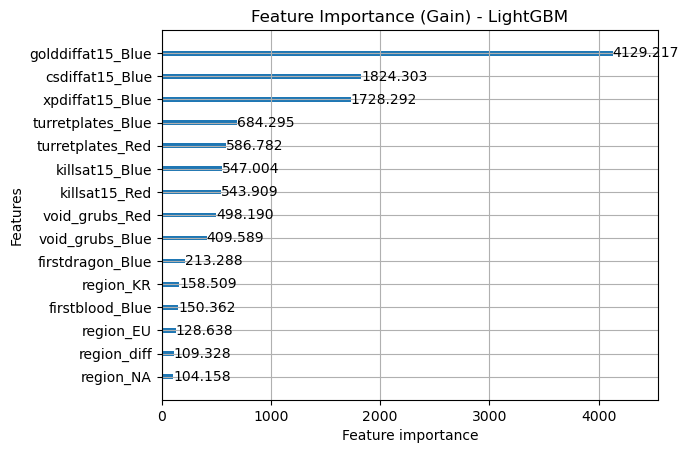

In [98]:
lgb.plot_importance(lgbm, max_num_features=15, importance_type='gain')
plt.title("Feature Importance (Gain) - LightGBM")
plt.show()

## Re-creating table with pick data

In [137]:
cols_to_keep_2 = ['gameid', 'league', 'side', 'teamname', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5', 'gamelength', 'result', 'firstblood',
                  'firstdragon', 'void_grubs', 'opp_void_grubs', 'turretplates', 'opp_turretplates', 'golddiffat15', 'xpdiffat15', 'csdiffat15',
                  'killsat15', 'opp_killsat15']

In [138]:
df5 = df1[df1['datacompleteness'] == 'complete'].reset_index(drop=True)
df5 = df5[cols_to_keep_2]
df5 = df5.dropna(subset='pick1')

In [139]:
df5

,gameid,league,side,teamname,pick1,pick2,pick3,pick4,pick5,gamelength,result,firstblood,firstdragon,void_grubs,opp_void_grubs,turretplates,opp_turretplates,golddiffat15,xpdiffat15,csdiffat15,killsat15,opp_killsat15
10,LOLTMNT03_183532,LCK,Blue,OKSavingsBank BRION,Skarner,K'Sante,Yone,Miss Fortune,Rell,1742,1,0.0,1.0,4.0,2.0,4.0,1.0,3067.0,2588.0,24.0,5.0,1.0
11,LOLTMNT03_183532,LCK,Red,DRX,Viktor,Corki,Sejuani,Leona,Jayce,1742,0,1.0,0.0,2.0,4.0,1.0,4.0,-3067.0,-2588.0,-24.0,1.0,5.0
22,LOLTMNT03_183538,LCK,Blue,DRX,Aurora,Wukong,Kai'Sa,Galio,Poppy,1655,1,0.0,1.0,6.0,0.0,7.0,2.0,1476.0,811.0,-6.0,3.0,1.0
23,LOLTMNT03_183538,LCK,Red,OKSavingsBank BRION,Rumble,Viego,Taliyah,Rakan,Xayah,1655,0,1.0,0.0,0.0,6.0,2.0,7.0,-1476.0,-811.0,6.0,1.0,3.0
34,LOLTMNT03_183544,LCK,Blue,OKSavingsBank BRION,Varus,Nautilus,Renekton,Brand,Yasuo,2480,0,1.0,0.0,5.0,1.0,2.0,3.0,1993.0,1056.0,5.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,LOLTMNT01_306141,WLDs,Red,KT Rolster,Alistar,Dr. Mundo,Corki,K'Sante,Syndra,2212,1,1.0,0.0,0.0,3.0,2.0,3.0,-287.0,-180.0,-9.0,6.0,4.0
14842,LOLTMNT01_307104,WLDs,Blue,T1,Kalista,Nocturne,Renata Glasc,Anivia,Gragas,1780,1,0.0,1.0,3.0,0.0,3.0,1.0,-28.0,1150.0,26.0,1.0,3.0
14843,LOLTMNT01_307104,WLDs,Red,KT Rolster,Trundle,Caitlyn,Cassiopeia,Tahm Kench,Mordekaiser,1780,0,1.0,0.0,0.0,3.0,1.0,3.0,28.0,-1150.0,-26.0,3.0,1.0
14854,LOLTMNT01_307105,WLDs,Blue,KT Rolster,Ziggs,Yorick,Nautilus,Sejuani,Smolder,2207,0,0.0,1.0,1.0,2.0,1.0,3.0,-1955.0,-718.0,11.0,2.0,5.0


In [140]:
df_combined_4 = df5.pivot(index='gameid', columns='side', values=['teamname', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5', 'gamelength', 'result',
                                                                  'firstblood', 'firstdragon', 'void_grubs', 'turretplates', 'golddiffat15',
                                                                  'xpdiffat15', 'csdiffat15', 'killsat15'])

df_combined_4.columns = [f'{col[0]}_{col[1]}' for col in df_combined_4.columns]
df_combined_4 = df_combined_4.reset_index()

In [141]:
df_combined_4

,gameid,teamname_Blue,teamname_Red,pick1_Blue,pick1_Red,pick2_Blue,pick2_Red,pick3_Blue,pick3_Red,pick4_Blue,pick4_Red,pick5_Blue,pick5_Red,gamelength_Blue,gamelength_Red,result_Blue,result_Red,firstblood_Blue,firstblood_Red,firstdragon_Blue,firstdragon_Red,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,golddiffat15_Blue,golddiffat15_Red,xpdiffat15_Blue,xpdiffat15_Red,csdiffat15_Blue,csdiffat15_Red,killsat15_Blue,killsat15_Red
0,LOLTMNT01_191712,Shopify Rebellion,FlyQuest,Skarner,Ivern,Varus,Ashe,Jax,Urgot,Leona,Cassiopeia,Hwei,Rell,1588,1588,0,1,1.0,0.0,0.0,1.0,1.0,5.0,1.0,6.0,-2755.0,2755.0,-1746.0,1746.0,-26.0,26.0,2.0,3.0
1,LOLTMNT01_191718,Shopify Rebellion,FlyQuest,K'Sante,Ambessa,Vi,Sejuani,Viktor,Azir,Caitlyn,Jhin,Maokai,Neeko,1814,1814,0,1,0.0,1.0,1.0,0.0,1.0,5.0,0.0,10.0,-3783.0,3783.0,-3053.0,3053.0,-65.0,65.0,2.0,3.0
2,LOLTMNT01_192790,LYON,Cloud9,Nocturne,Aurora,Orianna,Wukong,Ambessa,Renekton,Miss Fortune,Ashe,Rell,Braum,1800,1800,0,1,0.0,1.0,0.0,1.0,3.0,3.0,1.0,3.0,-1198.0,1198.0,-1383.0,1383.0,-33.0,33.0,0.0,1.0
3,LOLTMNT01_192797,LYON,Cloud9,Varus,Yone,Vi,Sejuani,Ahri,Leona,Rakan,Ziggs,Poppy,Gnar,1979,1979,0,1,1.0,0.0,0.0,1.0,1.0,5.0,2.0,2.0,-900.0,900.0,-122.0,122.0,-17.0,17.0,4.0,4.0
4,LOLTMNT01_193134,Dignitas,Team Liquid,Kalista,K'Sante,Sejuani,Renata Glasc,Senna,Draven,Yone,Wukong,Rumble,Azir,1965,1965,0,1,0.0,1.0,0.0,1.0,2.0,4.0,3.0,4.0,-2907.0,2907.0,-1695.0,1695.0,-31.0,31.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,LOLTMNT06_96459,G2 Esports,Team BDS,Vi,K'Sante,Kalista,Varus,Renata Glasc,Sejuani,Ambessa,Seraphine,Sylas,Orianna,1903,1903,0,1,1.0,0.0,0.0,1.0,3.0,3.0,8.0,2.0,3625.0,-3625.0,1344.0,-1344.0,38.0,-38.0,3.0,0.0
1234,LOLTMNT06_96473,Fnatic,Team Vitality,Skarner,Ivern,Ezreal,Azir,Rell,Corki,Rumble,Leona,Yone,Ambessa,1721,1721,1,0,0.0,1.0,0.0,1.0,3.0,3.0,5.0,1.0,3646.0,-3646.0,2194.0,-2194.0,76.0,-76.0,10.0,2.0
1235,LOLTMNT06_96516,Team Heretics,Fnatic,Viktor,Maokai,Ivern,Varus,Corki,Rell,Leona,Hwei,Renekton,Jayce,1528,1528,0,1,0.0,1.0,0.0,1.0,0.0,6.0,1.0,11.0,-5112.0,5112.0,-2647.0,2647.0,-62.0,62.0,4.0,9.0
1236,LOLTMNT06_96529,Movistar KOI,Team Vitality,Corki,Vi,Zyra,Ezreal,K'Sante,Rakan,Rell,Ambessa,Yone,Ahri,2230,2230,1,0,0.0,1.0,0.0,1.0,5.0,1.0,5.0,2.0,1493.0,-1493.0,857.0,-857.0,39.0,-39.0,2.0,3.0


In [142]:
df_combined_5 = df_combined_4.drop(columns=['gamelength_Red', 'result_Red', 'firstblood_Red', 'firstdragon_Red', 'golddiffat15_Red',
                                            'xpdiffat15_Red', 'csdiffat15_Red'])

In [143]:
cols_to_numeric_2 = ['gamelength_Blue', 'result_Blue', 'firstblood_Blue', 'firstdragon_Blue', 'void_grubs_Blue', 'void_grubs_Red', 'turretplates_Blue',
                     'turretplates_Red', 'golddiffat15_Blue', 'xpdiffat15_Blue', 'csdiffat15_Blue', 'killsat15_Blue', 'killsat15_Red']

df_combined_5[cols_to_numeric_2] = df_combined_5[cols_to_numeric_2].apply(pd.to_numeric, errors='coerce')

In [144]:
df_combined_5['region_Blue'] = df_combined_5['teamname_Blue'].map(regions_dict)
df_combined_5['region_Red'] = df_combined_5['teamname_Red'].map(regions_dict)

df_combined_5['region_Blue'] = df_combined_5['region_Blue'].fillna('Other')
df_combined_5['region_Red'] = df_combined_5['region_Red'].fillna('Other')

df_combined_5['region'] = np.where(df_combined_5['region_Blue'] == df_combined_5['region_Red'], df_combined_5['region_Blue'], 'International')
df_combined_5['region_diff'] = df_combined_5['region_Blue'].map(region_strength) - df_combined_5['region_Red'].map(region_strength)

In [149]:
df_combined_6 = df_combined_5.drop(columns=['gameid', 'teamname_Blue', 'teamname_Red', 'region_Blue', 'region_Red'])
df_combined_6

,pick1_Blue,pick1_Red,pick2_Blue,pick2_Red,pick3_Blue,pick3_Red,pick4_Blue,pick4_Red,pick5_Blue,pick5_Red,gamelength_Blue,result_Blue,firstblood_Blue,firstdragon_Blue,void_grubs_Blue,void_grubs_Red,turretplates_Blue,turretplates_Red,golddiffat15_Blue,xpdiffat15_Blue,csdiffat15_Blue,killsat15_Blue,killsat15_Red,region,region_diff
0,Skarner,Ivern,Varus,Ashe,Jax,Urgot,Leona,Cassiopeia,Hwei,Rell,1588,0,1.0,0.0,1.0,5.0,1.0,6.0,-2755.0,-1746.0,-26.0,2.0,3.0,NA,0
1,K'Sante,Ambessa,Vi,Sejuani,Viktor,Azir,Caitlyn,Jhin,Maokai,Neeko,1814,0,0.0,1.0,1.0,5.0,0.0,10.0,-3783.0,-3053.0,-65.0,2.0,3.0,NA,0
2,Nocturne,Aurora,Orianna,Wukong,Ambessa,Renekton,Miss Fortune,Ashe,Rell,Braum,1800,0,0.0,0.0,3.0,3.0,1.0,3.0,-1198.0,-1383.0,-33.0,0.0,1.0,NA,0
3,Varus,Yone,Vi,Sejuani,Ahri,Leona,Rakan,Ziggs,Poppy,Gnar,1979,0,1.0,0.0,1.0,5.0,2.0,2.0,-900.0,-122.0,-17.0,4.0,4.0,NA,0
4,Kalista,K'Sante,Sejuani,Renata Glasc,Senna,Draven,Yone,Wukong,Rumble,Azir,1965,0,0.0,0.0,2.0,4.0,3.0,4.0,-2907.0,-1695.0,-31.0,1.0,4.0,NA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,Vi,K'Sante,Kalista,Varus,Renata Glasc,Sejuani,Ambessa,Seraphine,Sylas,Orianna,1903,0,1.0,0.0,3.0,3.0,8.0,2.0,3625.0,1344.0,38.0,3.0,0.0,EU,0
1234,Skarner,Ivern,Ezreal,Azir,Rell,Corki,Rumble,Leona,Yone,Ambessa,1721,1,0.0,0.0,3.0,3.0,5.0,1.0,3646.0,2194.0,76.0,10.0,2.0,EU,0
1235,Viktor,Maokai,Ivern,Varus,Corki,Rell,Leona,Hwei,Renekton,Jayce,1528,0,0.0,0.0,0.0,6.0,1.0,11.0,-5112.0,-2647.0,-62.0,4.0,9.0,EU,0
1236,Corki,Vi,Zyra,Ezreal,K'Sante,Rakan,Rell,Ambessa,Yone,Ahri,2230,1,0.0,0.0,5.0,1.0,5.0,2.0,1493.0,857.0,39.0,2.0,3.0,EU,0


In [194]:
champ_counts = df_combined_6[['pick1_Blue', 'pick1_Red', 'pick2_Blue', 'pick2_Red', 'pick3_Blue', 'pick3_Red', 'pick4_Blue', 'pick4_Red', 'pick5_Blue',
               'pick5_Red']].stack().value_counts()

blue_cols = ['pick1_Blue', 'pick2_Blue', 'pick3_Blue', 'pick4_Blue', 'pick5_Blue']
red_cols = ['pick1_Red', 'pick2_Red', 'pick3_Red', 'pick4_Red', 'pick5_Red']

champ_stats_blue = df_combined_6[blue_cols + ['gamelength_Blue', 'result_Blue']].copy()
champ_stats_red = df_combined_6[red_cols + ['gamelength_Blue', 'result_Blue']].copy()

blue_wins = champ_stats_blue[champ_stats_blue['result_Blue'] == 1]
red_wins = champ_stats_red[champ_stats_red['result_Blue'] == 0]

blue_long = pd.melt(blue_wins, id_vars='gamelength_Blue', value_vars=blue_cols, value_name='champion')[['champion', 'gamelength_Blue']]
red_long = pd.melt(red_wins, id_vars='gamelength_Blue', value_vars=red_cols, value_name='champion')[['champion', 'gamelength_Blue']]

all_winning_champs = pd.concat([blue_long, red_long])

scaling_dict = all_winning_champs.groupby('champion')['gamelength_Blue'].mean().to_dict()

global_avg = df_combined_6['gamelength_Blue'].mean()

In [171]:
def get_scaling_score(champ):
    return scaling_dict.get(champ, global_avg)

def calculate_team_scaling(row, cols):
    total_score = 0
    for col in cols:
        champ = row[col]
        total_score += get_scaling_score(champ)
    return total_score

In [173]:
df_combined_6['scaling_Blue'] = df_combined_6.apply(lambda row: calculate_team_scaling(row, blue_cols), axis=1)
df_combined_6['scaling_Red'] = df_combined_6.apply(lambda row: calculate_team_scaling(row, red_cols), axis=1)

df_combined_6['scaling_diff'] = df_combined_6['scaling_Blue'] - df_combined_6['scaling_Red']

In [176]:
df_combined_6 = df_combined_6.drop(columns=['scaling_Blue', 'scaling_Red'])

## Modelling Part 2

In [181]:
sorted(scaling_dict.items(), key=lambda item: item[1])

[('Urgot', 1588.0),
 ('Hecarim', 1623.0),
 ('Talon', 1653.0),
 ('Fiora', 1681.5),
 ('Volibear', 1721.0),
 ('Shen', 1763.5714285714287),
 ("Kog'Maw", 1782.0),
 ('Karthus', 1801.0),
 ('Taric', 1805.3333333333333),
 ('Malphite', 1806.0),
 ('Kennen', 1811.0),
 ('Twitch', 1819.0),
 ('Draven', 1822.25),
 ('Sett', 1828.7142857142858),
 ('Lee Sin', 1840.391304347826),
 ('Tryndamere', 1844.5),
 ('Irelia', 1858.0),
 ('Zoe', 1860.8333333333333),
 ('Seraphine', 1869.8),
 ('Camille', 1877.3225806451612),
 ('Vayne', 1877.3333333333333),
 ('LeBlanc', 1888.090909090909),
 ('Janna', 1892.5),
 ('Ahri', 1893.9620253164558),
 ('Lulu', 1894.7083333333333),
 ('Yasuo', 1895.5),
 ('Twisted Fate', 1896.857142857143),
 ('Nilah', 1898.0),
 ('Anivia', 1901.0),
 ('Qiyana', 1902.857142857143),
 ('Dr. Mundo', 1903.0),
 ('Zeri', 1903.1162790697674),
 ('Veigar', 1907.5),
 ('Ashe', 1908.98),
 ('Jax', 1910.7058823529412),
 ('Zed', 1913.125),
 ('Jayce', 1918.2553191489362),
 ('Sion', 1919.2358490566037),
 ('Elise', 1923.